In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
advertising=pd.read_csv(r"C:/Users/Vidhya/Downloads/Advertising.csv")

In [11]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
advertising=advertising.drop(["Unnamed: 0"],axis=1)

In [23]:
advertising.shape

(200, 4)

In [24]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [26]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

In [16]:
# There are no NULL values in the dataset, hence it is clean.

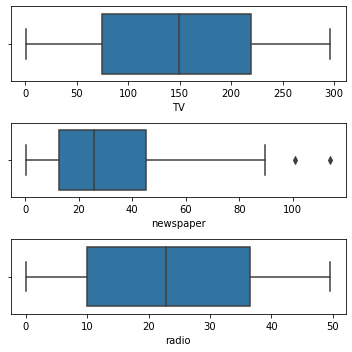

In [30]:
# Finding Outliers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
#There are no considerable outliers present in the data
#Sales is the target variable

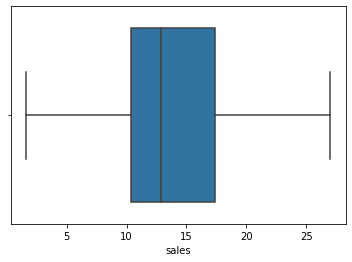

In [31]:
sns.boxplot(advertising['sales'])
plt.show()

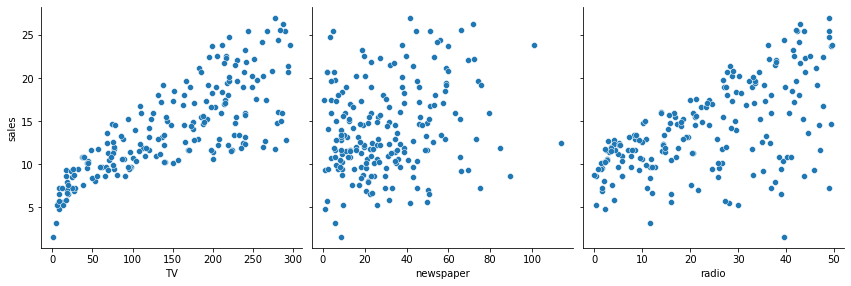

In [32]:
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

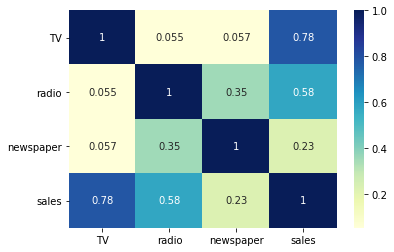

In [33]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
#As per pairplot and the heatmap, the variable TV seems to be most correlated with Sales.

In [35]:
X = advertising['TV']
y = advertising['sales']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [38]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [39]:
import statsmodels.api as sm

In [40]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [41]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [42]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.84e-30
Time:                        13:28:15   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

In [ ]:
#The coefficient for TV is 0.054, with a very low p value
# 81.6% of the variance in Sales is explained by TV

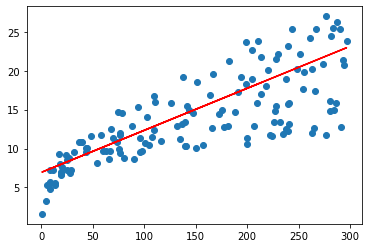

In [43]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [44]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

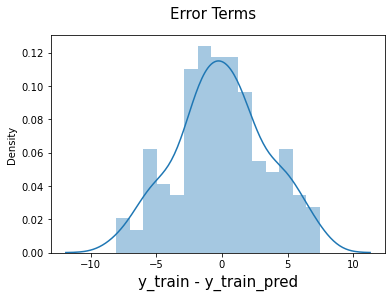

In [45]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

In [ ]:
#The residuals are following the normally distributed with a mean 0

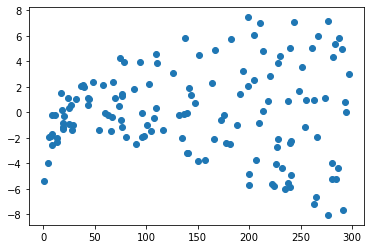

In [46]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
#regression line is a pretty good fit to the data

In [47]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [48]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [53]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783297

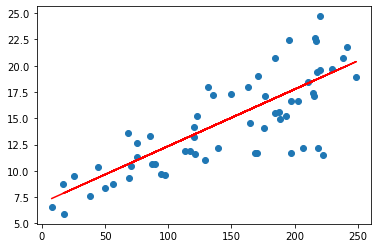

In [52]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()